<a href="https://colab.research.google.com/github/RCutrino/MLPNS_RCutrino/blob/main/titanictree_13_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import os
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!kaggle --version

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [12]:
cd MyDrive

/content/gdrive/MyDrive


In [13]:
cd .kaggle

/content/gdrive/MyDrive/.kaggle


In [14]:
!chmod 600 kaggle.json

In [18]:
envs = json.load(open("kaggle.json","r"))

In [19]:
envs.keys()

dict_keys(['username', 'key'])

In [20]:
os.environ["KAGGLE_USERNAME"]= envs["username"]
os.environ["KAGGLE_KEY"]= envs["key"]

In [21]:
!kaggle --version

Kaggle API 1.5.13


In [22]:
!kaggle datasets list 

ref                                                 title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023               Data Science Salaries 2023 💸                 25KB  2023-04-13 09:55:16           8465        224  1.0              
salvatorerastelli/spotify-and-youtube               Spotify and Youtube                           9MB  2023-03-20 15:43:25          12831        424  1.0              
iammustafatz/diabetes-prediction-dataset            Diabetes prediction dataset                 734KB  2023-04-08 06:11:45           4445         66  1.0              
shawkyelgendy/furniture-price-prediction            Furniture Price Prediction                   81KB  2023-04-17 09:35:17           1237         29  1.0       

In [23]:
!kaggle datasets list -s titanic

ref                                                 title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
heptapod/titanic                                    Titanic                                         11KB  2017-05-16 08:14:22          55151       1007  0.7058824        
brendan45774/test-file                              Titanic dataset                                 11KB  2021-12-02 16:11:42          57950        569  1.0              
azeembootwala/titanic                               Titanic                                         12KB  2017-06-05 12:14:37          16400        162  0.8235294        
rahulsah06/titanic                                  Titanic                                         34KB  2019-09-16 14:43:23           5799     

In [24]:
!kaggle datasets list -s heath

ref                                                          title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
bowdenjr/heathrow-weather-data                               Heathrow Weather Data                                12KB  2021-04-03 11:02:39            159          5  0.875            
skooch/ddsm-mammography                                      DDSM Mammography                                      3GB  2018-07-03 08:38:28           7317        181  0.75             
arjunnagesh/insurance                                        Heath Insurance                                      16KB  2021-04-19 17:43:34             75          2  0.3529412        
erhankul/shanghai-air-pollution-and-wheather-20142021        Shanghai_air_p

In [25]:
!kaggle datasets list -s health

ref                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
andrewmvd/fetal-health-classification               Fetal Health Classification                          46KB  2020-10-12 00:05:48          21348        427  1.0              
hhs/health-insurance-marketplace                    Health Insurance Marketplace                        829MB  2017-05-01 20:16:50          26010        610  0.7352941        
shariful07/student-mental-health                    Student Mental health                                 2KB  2023-02-17 02:11:56          18381        263  0.8235294        
alexteboul/diabetes-health-indicators-dataset       Diabetes Health Indicators Dataset                    6MB  2021-11-0

In [28]:
cd ..

/content/gdrive/MyDrive


In [29]:
cd MLPNS2023/

/content/gdrive/MyDrive/MLPNS2023


In [30]:
!mkdir kaggleTitanic

In [31]:
cd kaggleTitanic

/content/gdrive/MyDrive/MLPNS2023/kaggleTitanic


In [33]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 5.60MB/s]


In [34]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [35]:
ls

gender_submission.csv  test.csv  titanic.zip  train.csv


In [37]:
titanic = pd.read_csv("train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
titanic = titanic[["Pclass","Sex","Age"]]
titanic.shape

(891, 3)

In [41]:
titanic.describe()

,Pclass,Age
count,891.000000,714.000000
mean,2.308642,29.699118
std,0.836071,14.526497
min,1.000000,0.420000
25%,2.000000,20.125000
50%,3.000000,28.000000
75%,3.000000,38.000000
max,3.000000,80.000000


In [42]:
titanic['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [44]:
titanic.dropna(inplace=True)

<ipython-input-44-0e9622e1a85c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.dropna(inplace=True)


In [45]:
titanic['Gender']= titanic['Sex'].map({'male':0,'female':1})

<ipython-input-45-dc9b532e029a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Gender']= titanic['Sex'].map({'male':0,'female':1})


In [46]:
titanic.drop('Sex',axis=1,inplace=True)

<ipython-input-46-a468b523652c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.drop('Sex',axis=1,inplace=True)


In [62]:
from sklearn import tree
clf= tree.DecisionTreeClassifier(max_depth=5,random_state=222)

In [63]:
titanic_target = pd.read_csv("train.csv")[['Survived',"Pclass","Sex","Age"]].dropna()
titanic_target

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
885,0,3,female,39.0
886,0,2,male,27.0
887,1,1,female,19.0
889,1,1,male,26.0


In [64]:
titanic_target= titanic_target['Survived']

In [65]:
clf.fit(titanic.values, titanic_target.values)

DecisionTreeClassifier(max_depth=5, random_state=222)

In [66]:
clf.score(titanic.values, titanic_target.values)

0.8263305322128851

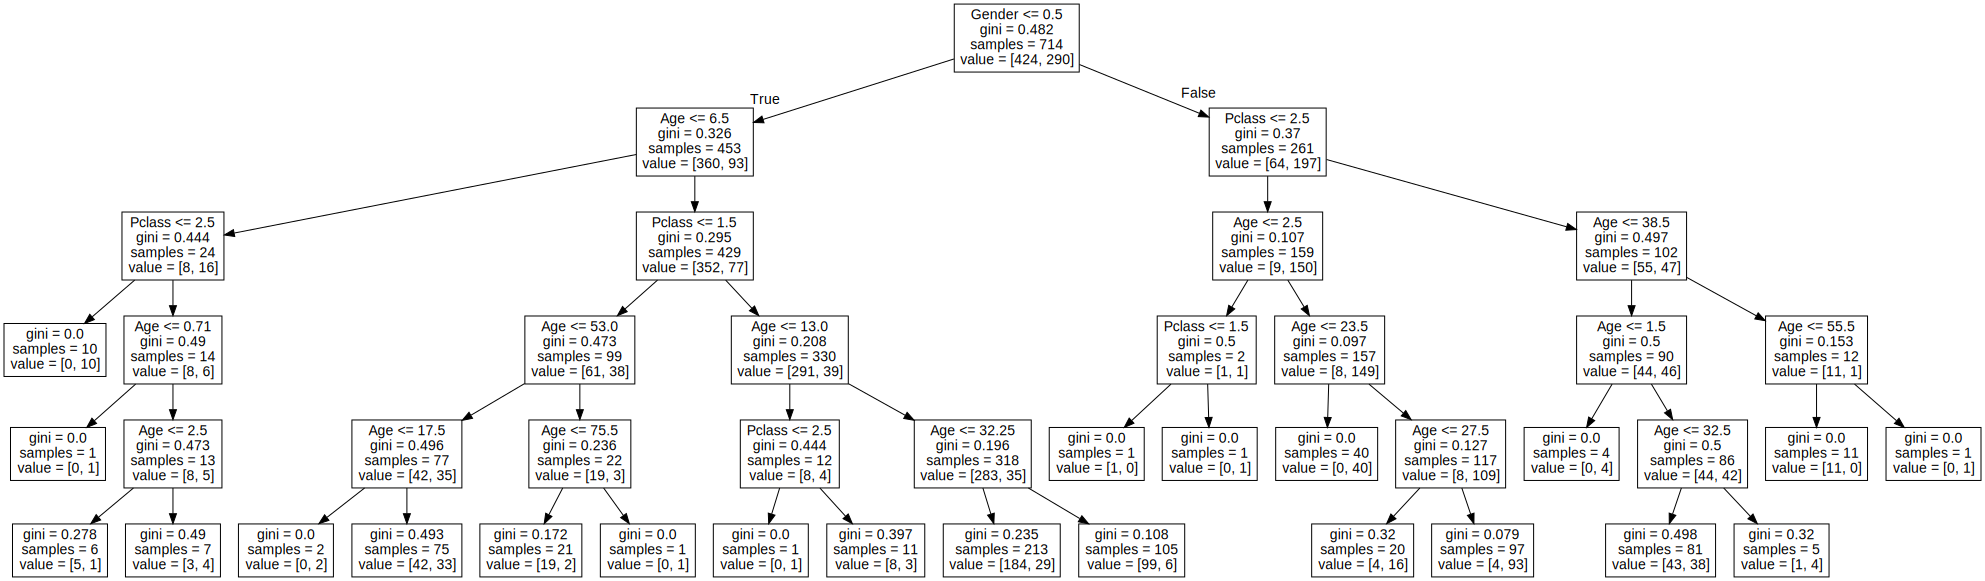

In [67]:
import graphviz
dot_data=tree.export_graphviz(clf,feature_names=titanic.columns, out_file=None)
graph= graphviz.Source(dot_data)
graph

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,x_test,Y_train,y_test= train_test_split(titanic.values, titanic_target.values,test_size=0.2)

In [73]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, random_state=222)

In [76]:
clf.score(X_train,Y_train)

0.8266199649737302

In [77]:
clf.score(x_test,y_test)

0.8461538461538461

In [78]:
clf2= tree.DecisionTreeClassifier(max_depth=3,random_state=222)
clf2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=222)

In [79]:
clf2.score(X_train,Y_train)

0.8161120840630472

In [80]:
clf2.score(x_test,y_test)

0.8181818181818182

In [83]:
clf0= tree.DecisionTreeClassifier(random_state=222).fit(X_train,Y_train)

In [84]:
clf0.score(X_train,Y_train)

0.9054290718038529

In [85]:
clf0.score(x_test,y_test)

0.8251748251748252